In [372]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Boundary-Value Problems for ODE
- Differential equations with conditions imposed at different points
- These are second-order equations with two boundary values
- the two-point boundary-value problem involve  a second-order differential equation of the form:

$$
y'' = f(x,y,y'), \quad \text{for } a \leq x \leq b,
$$
together with the boundary conditions:
$$
y(a)= \alpha \quad \text{and} \quad y(b)= \beta
$$

### 11.1 The Linear Shooting Method
Linear BVP:
$y'' = f(x,y,y')$ is linear when $p(x), q(x),$ and $r(x)$ exist with
$$
f(x,y,y') = p(x)y' + q(x)y + r(x)
$$

The shooting method for linear equations is based on the replacement of the linear BVP by the two initial IVP

$$
y''= p(x)y' + q(x)y + r(x), \quad y(a) = \alpha, \text{and} \quad y'(a) = 0 \quad (1) 
\\
y'' =  p(x)y' + q(x)y, \quad y(a) = 0 , \text{and} \quad y'(a)=1 \quad \quad \quad \quad (2)
$$


Let $y_1$ denote sol to (1) and $y_2$ denote sol to (2)

Define:
$$
y(x) = y_1(x) + \frac{\beta - y_1(b)}{y_2(b)}y_2(x)
\\
y'(x) = y_1'(x) + \frac{\beta - y_1(b)}{y_2(b)}y_2'(x)
\\
y''(x) = y_1'(x) + \frac{\beta - y_1(b)}{y_2(b)}y_2''(x)
$$
Subbing this into the equation we get:
$$
y'' = p(x)y'_1 + q(x) y_1 + r(x) + \frac{\beta - y_1(b)}{y_2(b)}(p(x)y'_2 + q(x)y_2) \\
= py' + qy +r
$$
where
$$
y(a) = y_1(a) \frac{\beta - y_1(b)}{y_2(b)}y_2(a) = \alpha + 0\\
y(b) = y_1(b) + \beta - y_1(b) = \beta
$$



In [373]:
#Linear Shooting
def LinearShooting(p,q,r, a, b, alpha, beta, N):
    h = (b-a)/N
    t=np.arange(a,b+h,h)
    u=np.zeros((2,len(t)))
    v=np.zeros((2,len(t)))
    w=np.zeros(2)
    
    u[0,0]=alpha
    u[1,0]=0 
    v[0,0]=0 
    v[1,0]=1


    k = np.zeros((4,2))
    kp = np.zeros((4,2))
    for i in range(1,N+1):
        k[0,0] = h*u[1,i-1]
        k[0,1] = h*(p(t[i-1])*u[1,i-1] + q(t[i-1])*u[0,i-1] + r(t[i-1]))
        k[1,0] = h*(u[1,i-1] + k[0,1]/2)
        k[1,1] = h*(p(t[i-1]+h/2)*(u[1,i-1]+k[0,1]/2)+ q(t[i-1]+h/2)*(u[0,i-1] + k[0,0]/2) + r(t[i-1]+h/2))
        k[2,0] = h*(u[1,i-1]+k[1,1]/2)
        k[2,1] = h*(p(t[i-1]+h/2)*(u[1,i-1]+k[1,1]/2)+ q(t[i-1]+h/2)*(u[0,i-1] + k[1,0]/2) + r(t[i-1]+h/2))
        k[3,0] = h*(u[1,i-1]+k[2,1])
        k[3,1] = h*(p(t[i-1]+h)*(u[1,i-1]+k[2,1])+ q(t[i-1]+h)*(u[0,i-1] + k[2,0]) + r(t[i-1]+h))
        
        u[0,i] = u[0,i-1] + (k[0,0] + 2*k[1,0] + 2*k[2,0] + k[3,0])/6
        u[1,i] = u[1,i-1] + (k[0,1] + 2*k[1,1] + 2*k[2,1] + k[3,1])/6

        kp[0,0] = h*v[1,i-1]
        kp[0,1] = h*(p(t[i-1])*v[1,i-1] + q(t[i-1])*v[0,i-1])
        kp[1,0] = h*(v[1,i-1] + kp[0,1]/2)
        kp[1,1] = h*(p(t[i-1]+h/2)*(v[1,i-1]+kp[0,1]/2)+ q(t[i-1]+h/2)*(v[0,i-1] + kp[0,0]/2))
        kp[2,0] = h*(v[1,i-1]+kp[1,1]/2)
        kp[2,1] = h*(p(t[i-1]+h/2)*(v[1,i-1]+kp[1,1]/2)+ q(t[i-1]+h/2)*(v[0,i-1] + kp[1,0]/2))
        kp[3,0] = h*(v[1,i-1]+kp[2,1])
        kp[3,1] = h*(p(t[i-1]+h)*(v[1,i-1]+kp[2,1])+ q(t[i-1]+h)*(v[0,i-1] + kp[2,0]))
        
        v[0,i] = v[0,i-1] + (kp[0,0] + 2*kp[1,0] + 2*kp[2,0] + kp[3,0])/6
        v[1,i] = v[1,i-1] + (kp[0,1] + 2*kp[1,1] + 2*kp[2,1] + kp[3,1])/6

    W = np.zeros((len(t),4))
    W[0,0] = alpha
    W[0,1] = (beta-u[0,N])/(v[0,N])
    

    for i in range(1,N+2):
        W[i-1,0] = u[0,i-1] + w[1] * v[0,i-1]
        W[i-1,1] = v[0,i-1]
        W[i-1,2] = u[1,i-1] + w[1] * v[1,i-1]
        W[i-1,3] = u[0,i-1] + ((2-u[0,N])/(v[0,N]))*v[0,i-1]
    sol=np.column_stack((t,W))
  
    return sol

In [387]:
def f(x,y, yp):
    return -(2/x)*yp + (2/x**2)*y + np.sin(np.ln(x))/x**2
def p(x):
    return -(2/x)
def q(x):
    return (2/x**2)
def r(x):
    return np.sin(np.log(x))/x**2

sol=LinearShooting(p,q,r,1,2,1,2,10)
sol

array([[1.        , 1.        , 0.        , 0.        , 1.        ],
       [1.1       , 1.00896058, 0.09117986, 0.16978958, 1.09262916],
       [1.2       , 1.03245472, 0.16851175, 0.29393896, 1.18708471],
       [1.3       , 1.06674375, 0.23608704, 0.38765183, 1.28338227],
       [1.4       , 1.10928795, 0.29659067, 0.46027852, 1.38144589],
       [1.5       , 1.1583    , 0.35184379, 0.51781759, 1.48115939],
       [1.6       , 1.21248371, 0.40311695, 0.56425894, 1.58239245],
       [1.7       , 1.27087454, 0.4513184 , 0.6023407 , 1.68501396],
       [1.8       , 1.33273851, 0.49711137, 0.63399389, 1.78889854],
       [1.9       , 1.39750618, 0.54098928, 0.66061333, 1.89392951],
       [2.        , 1.46472815, 0.58332538, 0.68322815, 2.        ]])

In [410]:
def Exact(x):
    return ((11/10)-(1/70)*(8-12*np.sin(np.log(2))-4*np.cos(np.log(2))))*x + (1/70)*(8-12*np.sin(np.log(2))-4*np.cos(np.log(2)))/x**2 - (3/10)*np.sin(np.log(x)) - (1/10)*np.cos(np.log(x))

array([1.        , 1.0926293 , 1.18708484, 1.28338236, 1.38144595,
       1.48115942, 1.58239246, 1.68501396, 1.78889853, 1.89392951,
       2.        ])

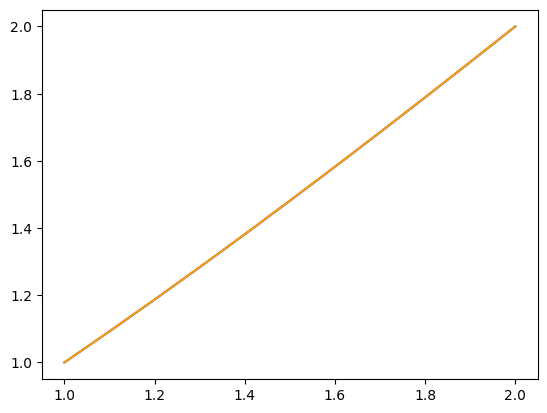

In [411]:
sol[:,0]
y=Exact(sol[:,0])
plt.plot(sol[:,0],sol[:,4],color='blue')
plt.plot(sol[:,0],y,color='orange')
y
